First, we use pandas to load datas

In [1]:
import pandas as pd
def fetch_data(route):
    data = pd.read_csv(route)
    return data

In [4]:
train = fetch_data("train.csv")
test = fetch_data("test.csv")

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that there is missing value in Age column. So we fill the empty column using its median.

In [6]:
median_train = train["Age"].median()
train["Age"] = train["Age"].fillna(median_train)
median_test = test["Age"].median()
test["Age"]=test["Age"].fillna(median_test)
median_test_fare = test["Fare"].median()
test["Fare"]=test["Fare"].fillna(median_test)

There are four numeric features: Age, SibSp, Parch and Fare. Pclass is a categorical feature which is encoded as integer.

In [7]:
data_numeric = ["Age", "SibSp", "Parch", "Fare"]

Draw the histograms of these four numeric feature to get an intuitive sense.

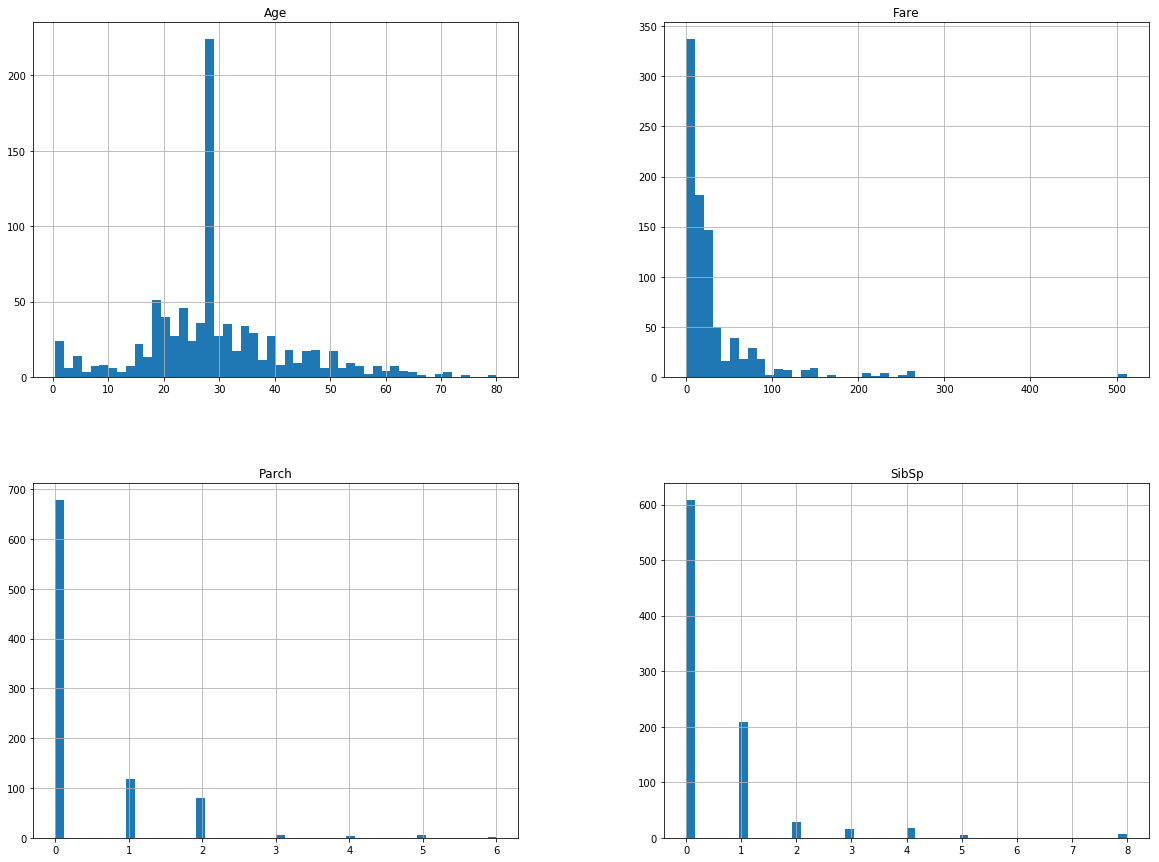

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
train[data_numeric].hist(bins=50, figsize=(20,15))
plt.show()

I decided to split Age into 10 groups and Fare into 10 groups to make bar charts grouped by if survived or not to see if there is relationship between them

In [9]:
import numpy as np
def age_process(age):
    return np.ceil(age/8)

In [10]:
train["Age"]=train["Age"].apply(age_process)
test["Age"]=test["Age"].apply(age_process)

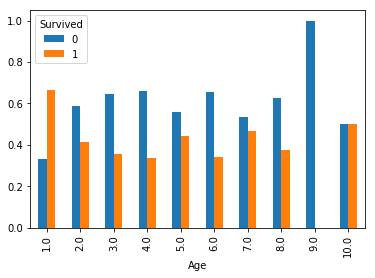

In [11]:
crosstab = pd.crosstab(train["Age"],train["Survived"])
crosstab_age_by_survive = crosstab.astype('float').div(crosstab.sum(axis=1), axis=0)
crosstab_age_by_survive.plot(kind = "bar")

Then we split fare into categories

In [12]:
def fare_process(fare):
    return np.ceil(fare/20)

In [13]:
train["Fare"] = train["Fare"].apply(fare_process)
test["Fare"] = test["Fare"].apply(fare_process)

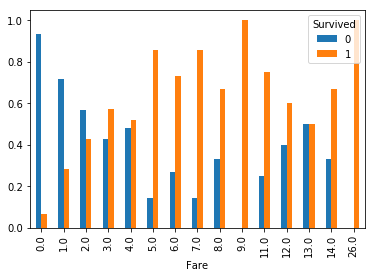

In [14]:
crosstab_fare = pd.crosstab(train["Fare"],train["Survived"])
crosstab_fare_by_survive = crosstab_fare.astype('float').div(crosstab_fare.sum(axis=1), axis=0)
crosstab_fare_by_survive
crosstab_fare_by_survive.plot(kind = "bar")

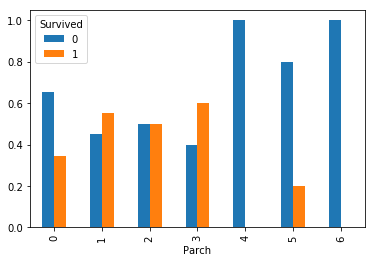

In [15]:
crosstab_parch = pd.crosstab(train["Parch"],train["Survived"])
crosstab_parch_by_survive = crosstab_parch.astype('float').div(crosstab_parch.sum(axis=1), axis=0)
crosstab_parch_by_survive.plot(kind = "bar")

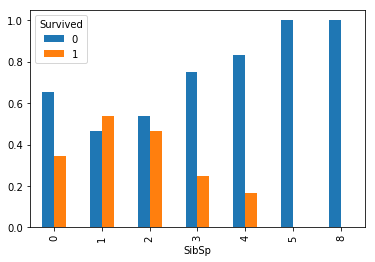

In [16]:
crosstab_sibSp = pd.crosstab(train["SibSp"],train["Survived"])
crosstab_sibSp_by_survive = crosstab_sibSp.astype('float').div(crosstab_sibSp.sum(axis=1), axis=0)
crosstab_sibSp_by_survive.plot(kind = "bar")

In [17]:
def family_process(sib, parch):
    return np.ceil(sib+parch)

In [18]:
train["family"] = list(map(family_process,train["SibSp"],train["Parch"]))
test["family"] = list(map(family_process,test["SibSp"],test["Parch"]))

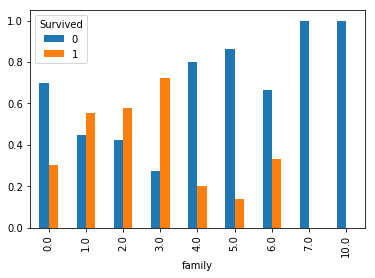

In [19]:
crosstab_fam = pd.crosstab(train["family"],train["Survived"])
crosstab_fam_by_survive =crosstab_fam.astype('float').div(crosstab_fam.sum(axis=1), axis=0)
crosstab_fam_by_survive.plot(kind = "bar")

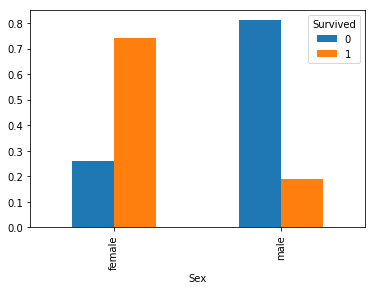

In [20]:
crosstab_sex = pd.crosstab(train["Sex"],train["Survived"])
crosstab_sex_by_survive =crosstab_sex.astype('float').div(crosstab_sex.sum(axis=1), axis=0)
crosstab_sex_by_survive.plot(kind = "bar")

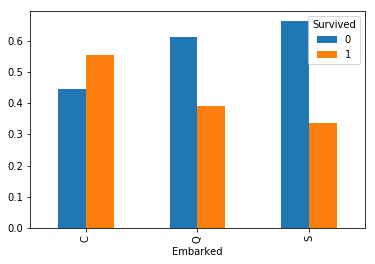

In [21]:
crosstab_embark = pd.crosstab(train["Embarked"],train["Survived"])
crosstab_embark_by_survive =crosstab_embark.astype('float').div(crosstab_embark.sum(axis=1), axis=0)
crosstab_embark_by_survive.plot(kind = "bar")

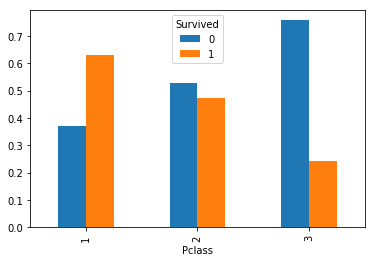

In [22]:
crosstab_pclass = pd.crosstab(train["Pclass"],train["Survived"])
crosstab_pclass_by_survive =crosstab_pclass.astype('float').div(crosstab_pclass.sum(axis=1), axis=0)
crosstab_pclass_by_survive.plot(kind = "bar")

In [24]:
def title_process(name):
    namelist = name.split(',')
    title = namelist[1].split(' ')
    return title[1]    

In [25]:
train["title"] = train["Name"].apply(title_process)
test["title"] = test["Name"].apply(title_process)

In [26]:
pd.crosstab(train['title'], train['Sex'])

Sex,female,male
title,,
Capt.,0,1
Col.,0,2
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40
Miss.,182,0


In [27]:
def title_reduce(title):
    if (title == "Miss." or title == "Mrs." or title == "Master." 
        or title == "Mr."):
        return title
    else:
        return "Other"

In [28]:
train["title"] = train["title"].apply(title_reduce)
test["title"] = test["title"].apply(title_reduce)

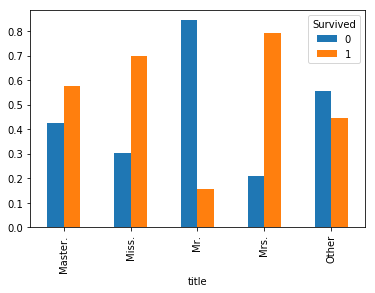

In [29]:
crosstab_title = pd.crosstab(train["title"],train["Survived"])
crosstab_title_by_survive =crosstab_title.astype('float').div(crosstab_title.sum(axis=1), axis=0)
crosstab_title_by_survive.plot(kind = "bar")

In [30]:
train_prepare = train.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)
test_prepare = test.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)
train_prepare = pd.get_dummies(train_prepare, columns=["Sex","Pclass", "title"])
test_prepare = pd.get_dummies(test_prepare, columns=["Sex","Pclass", "title"])


In [31]:
train_prepare.head()

,Survived,Age,Fare,family,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Other
0,0,3.0,1.0,1.0,0,1,0,0,1,0,0,1,0,0
1,1,5.0,4.0,1.0,1,0,1,0,0,0,0,0,1,0
2,1,4.0,1.0,0.0,1,0,0,0,1,0,1,0,0,0
3,1,5.0,3.0,1.0,1,0,1,0,0,0,0,0,1,0
4,0,5.0,1.0,0.0,0,1,0,0,1,0,0,1,0,0


In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_prepare, test_size=0.2, random_state=42)
X_train = train_set.drop("Survived",axis=1)
y_train = train_set["Survived"]
X_test = test_set.drop("Survived",axis=1)
y_test = test_set["Survived"]

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(n_iter=750, penalty=None, eta0=0.1) 
sgd_clf.fit(X_train, y_train)
score = cross_val_score(sgd_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.81148970398970399

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train,y_train)
score = cross_val_score(dtc_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.81562097812097822

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
score = cross_val_score(knn_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.81589232089232089

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_neighbors': [3,10,30]}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 3}

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=0)
rf_clf.fit(X_train,y_train)
score = cross_val_score(rf_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.82697232947232957

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [1,10,100], 'max_leaf_nodes': [16,32,64,128], 'max_features': [2, 4, 6, 8]}
]

grid_search = GridSearchCV(rf_clf, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 6, 'max_leaf_nodes': 16, 'n_estimators': 10}

In [41]:
rf_clf = RandomForestClassifier(n_estimators =10, max_leaf_nodes = 32,max_features = 2)
rf_clf.fit(X_train,y_train)
score = cross_val_score(rf_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.82002359502359512

In [46]:
from sklearn.svm import LinearSVC
svm_clf =  LinearSVC(C=1, loss="hinge")
svm_clf.fit(X_train, y_train)
score = cross_val_score(svm_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.82141248391248411

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
score = cross_val_score(gnb_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.79083976833976843

In [48]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
score = cross_val_score(log_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.83133526383526402

In [50]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
            estimators=[("sgd_clf", sgd_clf), ("dtc_clf", dtc_clf), ("knn_clf", knn_clf),
                       ("rf_clf", rf_clf), ("svm_clf", svm_clf), 
                       ("gnb_clf", gnb_clf),("log_clf",log_clf)],
            voting='hard'
)
score = cross_val_score(voting_clf, X_train, y_train, cv=20, scoring="accuracy")
score.mean()

0.83843843843843846

In [51]:
voting_clf.fit(X_train,y_train)
final_predictions = voting_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_predictions)

0.82122905027932958

In [53]:
from sklearn.model_selection import train_test_split
X_train_final = train_prepare.drop("Survived",axis=1)
y_train_final =  train_prepare["Survived"]
voting_clf.fit(X_train_final,y_train_final)
predict = voting_clf.predict(test_prepare)

In [54]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predict
})
submission.to_csv('submission.csv', index=False)